In [2]:
# Load Libraries
import polars as pl 
import polars.selectors as cs 

## Aggregations with Polars

In [3]:
student_grades = pl.DataFrame(
    {'name':['Atong', 'Deng', 'Nyapal', 'Ayen'],
    'math':[99, 98, 95, 90],
    'data science':[92, None, 99, 88],
    'english':[81, 83, 75, 89],
    'swahili':[94, 92, 99, 98]
    })

# Inspect the data
print(student_grades)

shape: (4, 5)
┌────────┬──────┬──────────────┬─────────┬─────────┐
│ name   ┆ math ┆ data science ┆ english ┆ swahili │
│ ---    ┆ ---  ┆ ---          ┆ ---     ┆ ---     │
│ str    ┆ i64  ┆ i64          ┆ i64     ┆ i64     │
╞════════╪══════╪══════════════╪═════════╪═════════╡
│ Atong  ┆ 99   ┆ 92           ┆ 81      ┆ 94      │
│ Deng   ┆ 98   ┆ null         ┆ 83      ┆ 92      │
│ Nyapal ┆ 95   ┆ 99           ┆ 75      ┆ 99      │
│ Ayen   ┆ 90   ┆ 88           ┆ 89      ┆ 98      │
└────────┴──────┴──────────────┴─────────┴─────────┘


In [4]:
# Identifying and Removing the lowest two grades
print(
    student_grades
    .select(scores=pl.concat_list(cs.integer(),))
    .with_columns(ordered_scores=pl.col('scores').list.sort())
    .with_columns(trimmed_scores=pl.col('ordered_scores').list.slice(2, 4))
    .with_columns(total=pl.col('trimmed_scores').list.sum())
    .with_columns(avg_score=pl.col('scores').list.mean())
    .with_columns(avg_score=pl.col('scores').list.max())
    .with_columns(avg_score=pl.col('scores').list.min())
)

shape: (4, 5)
┌──────────────────┬──────────────────┬────────────────┬───────┬───────────┐
│ scores           ┆ ordered_scores   ┆ trimmed_scores ┆ total ┆ avg_score │
│ ---              ┆ ---              ┆ ---            ┆ ---   ┆ ---       │
│ list[i64]        ┆ list[i64]        ┆ list[i64]      ┆ i64   ┆ i64       │
╞══════════════════╪══════════════════╪════════════════╪═══════╪═══════════╡
│ [99, 92, … 94]   ┆ [81, 92, … 99]   ┆ [94, 99]       ┆ 193   ┆ 81        │
│ [98, null, … 92] ┆ [null, 83, … 98] ┆ [92, 98]       ┆ 190   ┆ 83        │
│ [95, 99, … 99]   ┆ [75, 95, … 99]   ┆ [99, 99]       ┆ 198   ┆ 75        │
│ [90, 88, … 98]   ┆ [88, 89, … 98]   ┆ [90, 98]       ┆ 188   ┆ 88        │
└──────────────────┴──────────────────┴────────────────┴───────┴───────────┘


In [5]:
# Importing dataset
url = 'https://raw.githubusercontent.com/tongakuot/alierwai-datastudio/main/case-studies/posts/2023/10/18/Community_Crime_Statistics.csv'

crime_raw = pl.read_csv(url)

print(crime_raw.head())

shape: (5, 14)
┌────────────┬────────────┬────────────┬───────┬───┬───────────┬───────────┬───────────┬───────────┐
│ Sector     ┆ Community  ┆ Category   ┆ Crime ┆ … ┆ Calgary   ┆ Ward Boun ┆ Ward Boun ┆ City      │
│ ---        ┆ Name       ┆ ---        ┆ Count ┆   ┆ Communiti ┆ daries    ┆ daries    ┆ Quadrants │
│ str        ┆ ---        ┆ str        ┆ ---   ┆   ┆ es        ┆ 2013-2017 ┆ ---       ┆ ---       │
│            ┆ str        ┆            ┆ i64   ┆   ┆ ---       ┆ ---       ┆ i64       ┆ i64       │
│            ┆            ┆            ┆       ┆   ┆ i64       ┆ i64       ┆           ┆           │
╞════════════╪════════════╪════════════╪═══════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ NORTHWEST  ┆ 02E        ┆ Violence   ┆ 1     ┆ … ┆ 204       ┆ 10        ┆ 3         ┆ 2         │
│            ┆            ┆ 'Other'    ┆       ┆   ┆           ┆           ┆           ┆           │
│            ┆            ┆ (Non-domes ┆       ┆   ┆           ┆           ┆

In [6]:
list(crime_raw.columns)

['Sector',
 'Community Name',
 'Category',
 'Crime Count',
 'Date',
 'Year',
 'Month',
 'ID',
 'Resident Count',
 'Community Center Point',
 'Calgary Communities',
 'Ward Boundaries 2013-2017',
 'Ward Boundaries',
 'City Quadrants']

In [7]:
# Clean & transform crime data
crime_df = (
    crime_raw
    .select(['Sector', 'Community Name', 'Category',
             'Crime Count', 'Date', 'Year', 'Month'])
    .select(pl.all().name.to_lowercase())
    .rename({'crime count': 'crime_count', 'community name': 'community_name'})
    .sort('year')
)

# Inspect the first 5 rows
print(crime_df)

shape: (79_982, 7)
┌───────────┬──────────────────────────┬────────────────────┬─────────────┬─────────┬──────┬───────┐
│ sector    ┆ community_name           ┆ category           ┆ crime_count ┆ date    ┆ year ┆ month │
│ ---       ┆ ---                      ┆ ---                ┆ ---         ┆ ---     ┆ ---  ┆ ---   │
│ str       ┆ str                      ┆ str                ┆ i64         ┆ str     ┆ i64  ┆ str   │
╞═══════════╪══════════════════════════╪════════════════════╪═════════════╪═════════╪══════╪═══════╡
│ EAST      ┆ FOREST HEIGHTS           ┆ Street Robbery     ┆ 1           ┆ 2017/08 ┆ 2017 ┆ AUG   │
│ NORTH     ┆ NORTH HAVEN              ┆ Theft OF Vehicle   ┆ 1           ┆ 2017/11 ┆ 2017 ┆ NOV   │
│ WEST      ┆ GLAMORGAN                ┆ Street Robbery     ┆ 1           ┆ 2017/06 ┆ 2017 ┆ JUN   │
│ NORTHWEST ┆ BRENTWOOD                ┆ Assault            ┆ 1           ┆ 2017/06 ┆ 2017 ┆ JUN   │
│           ┆                          ┆ (Non-domestic)     ┆           

In [8]:
# Clean & transform - sector, community name, category and date columns
cat_mappings = {
    "Assault (non-domestic)": "Non-domestic Violence",
    "Break & Enter - Other Premises": "Break-ins - Other premises",
    "Break & Enter - Dwelling": "Break-ins - Residential",
    "Break & Enter - Commercial": "Break-ins - Commercial",
    "Violence Other (non-domestic)": "Non-domestic Violence",
    "Violence\xa0 'other' (non-domestic)": "Non-domestic Violence",
    "Commercial Robbery": "Robbery - Commercial",
    "Theft Of Vehicle": "Theft of Vehicle",
    "Theft From Vehicle": "Theft from Vehicle",
    "Street Robbery": "Robbery - Street"
}

crime_cleaned = (
    crime_df    
    .with_columns(cs.string().str.to_titlecase())
    .with_columns(date=pl.col('date').str.to_datetime('%Y/%m').cast(pl.Datetime))
    .with_columns(
        year_2=pl.col('date').dt.year(),
        month_2=pl.col('date').dt.month(),
        year_month=pl.col('date').dt.strftime('%Y-%m'),
        year_month_day=pl.col('date').dt.strftime('%Y-%m-%d'),
        category=pl.col('category').str.strip_chars().replace(cat_mappings)
    )
    .with_columns(starts_with_number=pl.col('community_name').str.contains(r'^(\d+)'))
    .sort('community_name')
    .filter(~pl.col('starts_with_number'))
)

# inspect the first 3 rows
print(crime_cleaned.head())

shape: (5, 12)
┌───────────┬────────────┬───────────┬───────────┬───┬─────────┬───────────┬───────────┬───────────┐
│ sector    ┆ community_ ┆ category  ┆ crime_cou ┆ … ┆ month_2 ┆ year_mont ┆ year_mont ┆ starts_wi │
│ ---       ┆ name       ┆ ---       ┆ nt        ┆   ┆ ---     ┆ h         ┆ h_day     ┆ th_number │
│ str       ┆ ---        ┆ str       ┆ ---       ┆   ┆ i8      ┆ ---       ┆ ---       ┆ ---       │
│           ┆ str        ┆           ┆ i64       ┆   ┆         ┆ str       ┆ str       ┆ bool      │
╞═══════════╪════════════╪═══════════╪═══════════╪═══╪═════════╪═══════════╪═══════════╪═══════════╡
│ Northeast ┆ Abbeydale  ┆ Break-ins ┆ 1         ┆ … ┆ 8       ┆ 2017-08   ┆ 2017-08-0 ┆ false     │
│           ┆            ┆ - Commerc ┆           ┆   ┆         ┆           ┆ 1         ┆           │
│           ┆            ┆ ial       ┆           ┆   ┆         ┆           ┆           ┆           │
│ Northeast ┆ Abbeydale  ┆ Non-domes ┆ 1         ┆ … ┆ 8       ┆ 2017-08   ┆

In [9]:
# Clean & transform - category
print(
    crime_cleaned
    .select('category')
    .unique()
)



shape: (8, 1)
┌────────────────────────────┐
│ category                   │
│ ---                        │
│ str                        │
╞════════════════════════════╡
│ Theft of Vehicle           │
│ Robbery - Street           │
│ Break-ins - Residential    │
│ Non-domestic Violence      │
│ Theft from Vehicle         │
│ Break-ins - Other premises │
│ Robbery - Commercial       │
│ Break-ins - Commercial     │
└────────────────────────────┘


In [10]:
# Transforming category column with pl.when() method
crime_data = (
    crime_df    
    .with_columns(cs.string().str.to_titlecase())
    .with_columns(date=pl.col('date').str.to_datetime('%Y/%m').cast(pl.Datetime))
    .with_columns(
        year_2=pl.col('date').dt.year(),
        month_2=pl.col('date').dt.month(),
        year_month=pl.col('date').dt.strftime('%Y-%m'),
        year_month_day=pl.col('date').dt.strftime('%Y-%m-%d'),
        # category=pl.col('category').str.strip_chars().replace(cat_mappings)
    )
    .with_columns(
        category=pl.when(pl.col('category').str.contains('Violence|Assault'))
        .then(pl.lit('Non-domestic Violence'))
        .when(pl.col('category').str.ends_with('Premises'))
        .then(pl.lit('Break-ins - Other premises'))
        .when(pl.col('category').str.ends_with('Dwelling'))
        .then(pl.lit('Break-ins - Residential'))
        .when(pl.col('category').str.ends_with('Commercial'))
        .then(pl.lit('Break-ins - Commercial'))
        .when(pl.col('category').str.starts_with('Commercial'))
        .then(pl.lit('Robbery - Commercial'))
        .when(pl.col('category').str.starts_with('Street'))
        .then(pl.lit('Robbery - Street'))
        .when(pl.col('category').str.starts_with('Theft From'))
        .then(pl.lit('Theft from Vehicle'))
        .otherwise(pl.lit('Theft of Vehicle'))
    )
    .with_columns(starts_with_number=pl.col('community_name').str.extract(r'^(\d+)', 1).is_not_null())
    .with_columns(aa=pl.col('community_name').str.contains(r'^(\d+)'))
    .sort('community_name')
)

# inspect the first 3 rows
print(crime_data.head())

shape: (5, 13)
┌───────────┬────────────┬────────────┬────────────┬───┬────────────┬───────────┬───────────┬──────┐
│ sector    ┆ community_ ┆ category   ┆ crime_coun ┆ … ┆ year_month ┆ year_mont ┆ starts_wi ┆ aa   │
│ ---       ┆ name       ┆ ---        ┆ t          ┆   ┆ ---        ┆ h_day     ┆ th_number ┆ ---  │
│ str       ┆ ---        ┆ str        ┆ ---        ┆   ┆ str        ┆ ---       ┆ ---       ┆ bool │
│           ┆ str        ┆            ┆ i64        ┆   ┆            ┆ str       ┆ bool      ┆      │
╞═══════════╪════════════╪════════════╪════════════╪═══╪════════════╪═══════════╪═══════════╪══════╡
│ Northwest ┆ 01b        ┆ Theft from ┆ 1          ┆ … ┆ 2017-07    ┆ 2017-07-0 ┆ true      ┆ true │
│           ┆            ┆ Vehicle    ┆            ┆   ┆            ┆ 1         ┆           ┆      │
│ Northwest ┆ 01b        ┆ Theft from ┆ 1          ┆ … ┆ 2017-11    ┆ 2017-11-0 ┆ true      ┆ true │
│           ┆            ┆ Vehicle    ┆            ┆   ┆            ┆ 1     

In [11]:
# Clean & transform - category
print(
    crime_data
    .select('category')
    .unique()
)


shape: (8, 1)
┌────────────────────────────┐
│ category                   │
│ ---                        │
│ str                        │
╞════════════════════════════╡
│ Break-ins - Other premises │
│ Robbery - Street           │
│ Theft of Vehicle           │
│ Robbery - Commercial       │
│ Theft from Vehicle         │
│ Break-ins - Commercial     │
│ Break-ins - Residential    │
│ Non-domestic Violence      │
└────────────────────────────┘


In [12]:
# Tweaking auto data
def tweak_crime_data(df):
        """
        Cleans and transforms crime data for analysis.
    
        This function processes a DataFrame containing crime data by performing the following steps:
        1. Selects relevant columns and renames them to lowercase.
        2. Renames specific columns to more descriptive names.
        3. Converts string columns to title case.
        4. Converts the 'date' column to a datetime object and extracts year and month information.
        5. Maps specific crime categories to standardized categories.
        6. Identifies and flags rows where the community name starts with a number.
        7. Sorts the DataFrame by 'community_name' and 'year'.
        8. Filters out rows where the community name starts with a number.
        9. Selects and returns the final set of relevant columns for analysis.
    
        Args:
            df (pl.DataFrame): The input DataFrame containing crime data with columns 'Sector', 'Community Name', 'Category', 'Crime Count', and 'Date'.
    
        Returns:
            pl.DataFrame: A cleaned and transformed DataFrame with relevant columns for analysis.
        """
        cat_mappings = {
        "Assault (non-domestic)": "Non-domestic Violence",
        "Break & Enter - Other Premises": "Break-ins - Other premises",
        "Break & Enter - Dwelling": "Break-ins - Residential",
        "Break & Enter - Commercial": "Break-ins - Commercial",
        "Violence Other (non-domestic)": "Non-domestic Violence",
        "Violence\xa0 'other' (non-domestic)": "Non-domestic Violence",
        "Commercial Robbery": "Robbery - Commercial",
        "Theft Of Vehicle": "Theft of Vehicle",
        "Theft From Vehicle": "Theft from Vehicle",
        "Street Robbery": "Robbery - Street"
        }

        return(
            df   
            .select('Sector', 'Community Name', 'Category', 'Crime Count', 'Date')
            .select(pl.all().name.to_lowercase())
            .rename({'crime count': 'crime_count', 'community name': 'community_name'}) 
            .with_columns(cs.string().str.to_titlecase())
            .with_columns(date=pl.col('date').str.to_datetime('%Y/%m').cast(pl.Datetime))
            .with_columns(
                year=pl.col('date').dt.year(),
                month=pl.col('date').dt.month(),
                year_month=pl.col('date').dt.strftime('%Y-%m'),
                category=pl.col('category').str.strip_chars().replace(cat_mappings)
            )
           .with_columns(starts_with_number=pl.col('community_name').str.contains(r'^(\d+)'))
           .sort(['community_name', 'year'])
           .filter(~pl.col('starts_with_number') & pl.col('sector').is_not_null())
           .select('sector', 'community_name', 'category', 'crime_count', 'year_month', 'year', 'month')
        )


In [13]:
# Let's our new function
print(tweak_crime_data(crime_raw))

shape: (78_775, 7)
┌───────────┬────────────────┬─────────────────────────┬─────────────┬────────────┬──────┬───────┐
│ sector    ┆ community_name ┆ category                ┆ crime_count ┆ year_month ┆ year ┆ month │
│ ---       ┆ ---            ┆ ---                     ┆ ---         ┆ ---        ┆ ---  ┆ ---   │
│ str       ┆ str            ┆ str                     ┆ i64         ┆ str        ┆ i32  ┆ i8    │
╞═══════════╪════════════════╪═════════════════════════╪═════════════╪════════════╪══════╪═══════╡
│ Northeast ┆ Abbeydale      ┆ Theft of Vehicle        ┆ 3           ┆ 2017-09    ┆ 2017 ┆ 9     │
│ Northeast ┆ Abbeydale      ┆ Non-domestic Violence   ┆ 2           ┆ 2017-05    ┆ 2017 ┆ 5     │
│ Northeast ┆ Abbeydale      ┆ Non-domestic Violence   ┆ 3           ┆ 2017-01    ┆ 2017 ┆ 1     │
│ Northeast ┆ Abbeydale      ┆ Non-domestic Violence   ┆ 2           ┆ 2017-09    ┆ 2017 ┆ 9     │
│ Northeast ┆ Abbeydale      ┆ Theft from Vehicle      ┆ 4           ┆ 2017-01    ┆ 2017 ┆

In [14]:
df = tweak_crime_data(crime_raw)
from lets_plot import *
LetsPlot.setup_html()
(
    ggplot(df, aes('sector', 'crime_count')) +
    geom_bar() +
    labs(
        x='Regions of Calgary City',
        y='Crime Frequency',
        title='Crime Activities by Region'
    )
)

In [15]:
aa = (
    df
    .group_by('category')
    .agg(total=pl.col('crime_count').sum())
)

(
    ggplot(aa, aes('category', 'total')) +
    geom_bar(stat='identity') +
    scale_y_continuous(limits=[0, 100_000])
)

In [53]:
aa =(
    df
    .group_by('category')
    .agg(total=pl.col('crime_count').sum())
    .sort(['total', 'category'], descending=True)
)

print(aa)

shape: (8, 2)
┌────────────────────────────┬───────┐
│ category                   ┆ total │
│ ---                        ┆ ---   │
│ str                        ┆ i64   │
╞════════════════════════════╪═══════╡
│ Theft from Vehicle         ┆ 81141 │
│ Non-domestic Violence      ┆ 45395 │
│ Theft of Vehicle           ┆ 35563 │
│ Break-ins - Commercial     ┆ 28969 │
│ Break-ins - Other premises ┆ 13753 │
│ Break-ins - Residential    ┆ 13520 │
│ Robbery - Street           ┆ 3930  │
│ Robbery - Commercial       ┆ 2229  │
└────────────────────────────┴───────┘


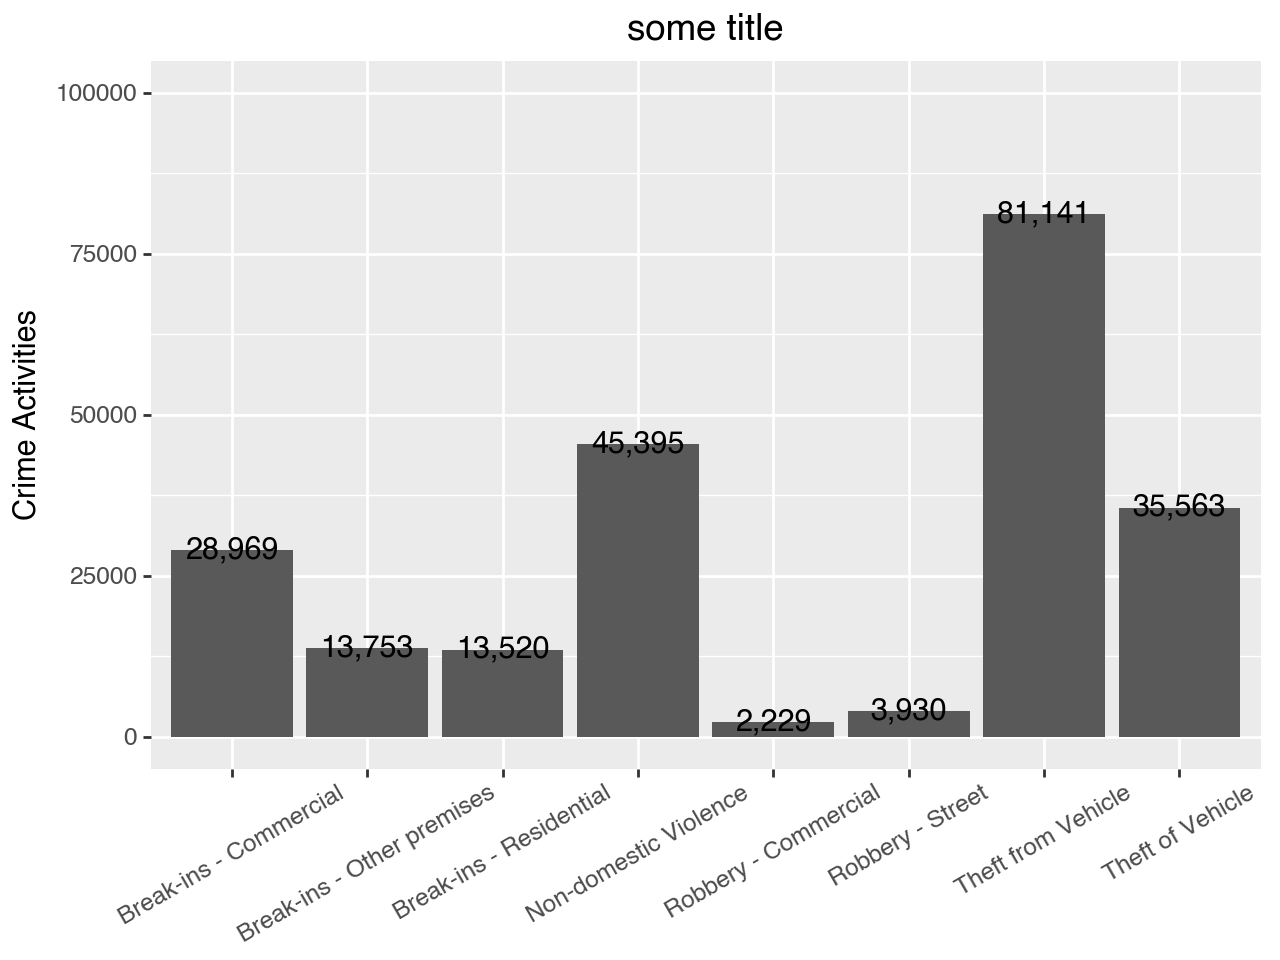

In [52]:
from plotnine import *

(
    ggplot(aa, aes('category', 'total')) 
    + geom_col() 
    + geom_text(aes(label='total'),
                format_string='{:,}')
    + scale_y_continuous(
        limits=[0, 100_000]
    ) 
    + labs(
        title='some title',
        x='',
        y='Crime Activities'
    )
    + theme(
        axis_text_x=element_text(angle=30),
        plot_background=element_blank()
    )
)